In [2]:
import pandas as pd

# Load the CSV
df = pd.read_csv("../../data/processed/pancancer_pseudobulk.csv")

# Separate sample IDs and expression values
sample_ids = df["SIDM"]
expression = df.drop(columns=["SIDM"])

print("✅ Loaded expression matrix:", expression.shape)


✅ Loaded expression matrix: (140, 30314)


In [3]:
from sklearn.decomposition import PCA

NUM_PCS = 100
pca_full = PCA(n_components=NUM_PCS, random_state=42)
pca_full_result = pca_full.fit_transform(expression)

print("✅ PCA shape:", pca_full_result.shape)


✅ PCA shape: (140, 100)


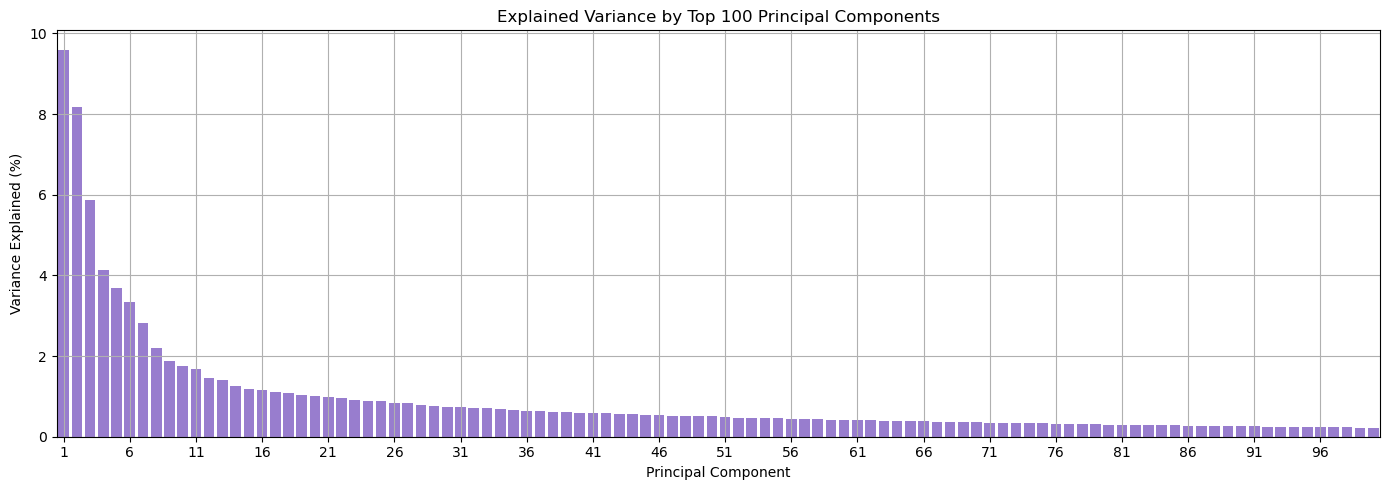

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))
sns.barplot(x=np.arange(1, NUM_PCS + 1),
            y=pca_full.explained_variance_ratio_ * 100,
            color="mediumpurple")
plt.title("Explained Variance by Top 100 Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.xticks(ticks=np.arange(0, NUM_PCS, 5), labels=[str(i+1) for i in range(0, NUM_PCS, 5)])
plt.grid(True)
plt.tight_layout()
plt.show()


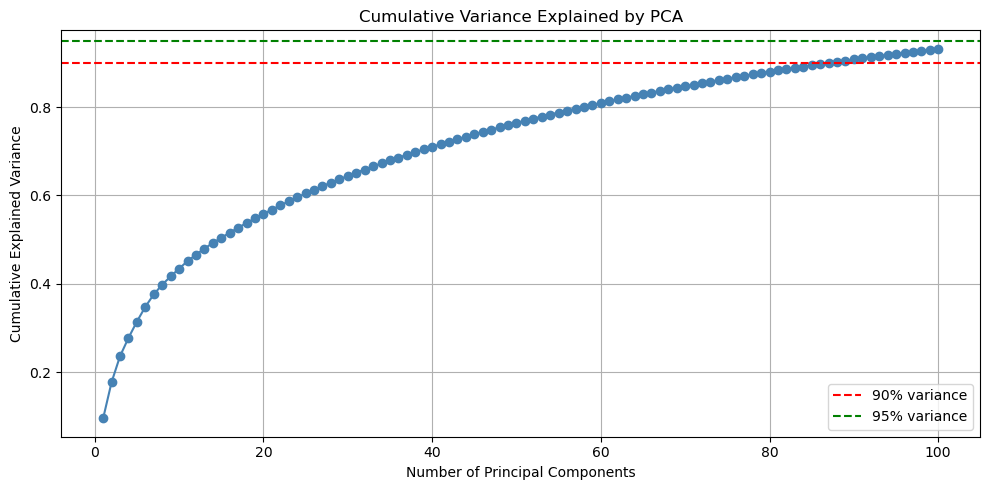

In [5]:
# Cumulative variance explained
cumulative_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, NUM_PCS + 1), cumulative_var, marker="o", color="steelblue")
plt.axhline(0.9, linestyle="--", color="red", label="90% variance")
plt.axhline(0.95, linestyle="--", color="green", label="95% variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Explained by PCA")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
SELECTED_PCS = 30

# Run PCA again for 30 components
pca = PCA(n_components=SELECTED_PCS, random_state=42)
pca_result = pca.fit_transform(expression)

# Create DataFrame with PCs and sample IDs
pca_df = pd.DataFrame(pca_result, columns=[f"SC_PC{i+1}" for i in range(SELECTED_PCS)])
pca_df.insert(0, "SAMPLE_ID", sample_ids)

# Save to file
pca_df.to_csv("../../data/processed/pancancer_pseudobulk_30_pcs.csv", index=False)

print("✅ Saved top 30 PCs to 'sc_pseudo_bulk_pca_top30.parquet'")


✅ Saved top 30 PCs to 'sc_pseudo_bulk_pca_top30.parquet'
